In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("F:/Python 2_Uber Case Study/Uber Request Data.csv")
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [3]:
df.shape

(6745, 6)

In [4]:
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


# Data Cleaning and Preparation

* We see that for the columns "Request timstamp"and "Drop timestamp" the format of DateTime is different for different sections of data. Some have it separated by "-" and some have it separated by "/".

* Let us first replace the "/" with "-" to have uniformity and then convert the enite column to standard datatime format.

In [6]:
df["Request timestamp"] = df["Request timestamp"].apply(lambda x: pd.to_datetime(x))

In [7]:
df["Drop timestamp"] = df["Drop timestamp"].apply(lambda x: pd.to_datetime(x))

In [8]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


* Check null values

In [9]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

* We now add 2 columns "Request hour"(which is Hour of the request during the day) and "Request day"(which is the day of the month) to determine and catogorise the load of cab service requests.

In [10]:
df["Request hour"] = df["Request timestamp"].dt.hour

In [11]:
df["Request day"] = df["Request timestamp"].dt.day

In [12]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15


# Visualization and Analysis

## Plots to visualise the frequency of requests that get cancelled or show no cars available.

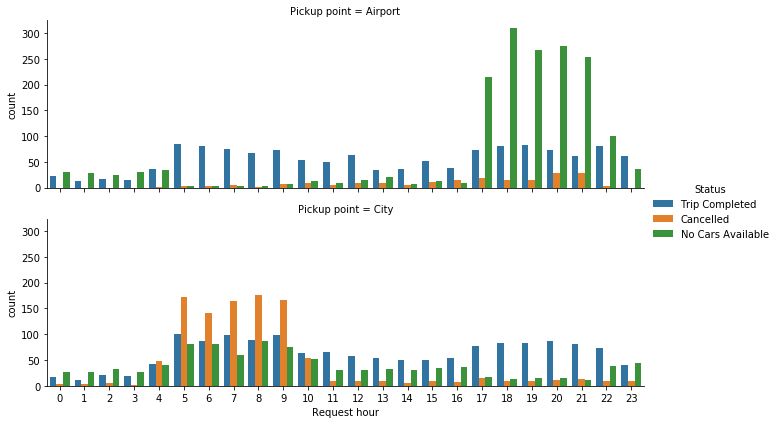

In [13]:
sns.catplot(x ="Request hour",hue ="Status",row ="Pickup point",data = df,kind = "count", height=3, aspect=3)
plt.show()

* Inference 1: Uber is facing 'No Car Available' issue at Airport in evening and night (5pm to 12am)
* Inference 2: Uber is facing cab 'Cancelled' issue in City during early morning and morning (4am to 10am)

## Plots to visualise the frequency of requests that get cancelled or show no cars available in the different time slots (early mornings, late evenings etc.)


# Session details
1) EARLY MORNING = Midnight to 5AM

2) MORNING = 5AM to 10AM

3) DAY TIME = 10AM to 5PM

4) EVENING = 5PM to 10PM

5) LATE NIGHT = 10PM TO Midnight

In [14]:
def time_period(x):
    if x < 5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day Time"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Late Night"

In [15]:
df['Time slot'] = df['Request hour'].apply(lambda x: time_period(x))
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Request day,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Day Time
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Morning
...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Late Night
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Late Night
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Late Night
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Late Night


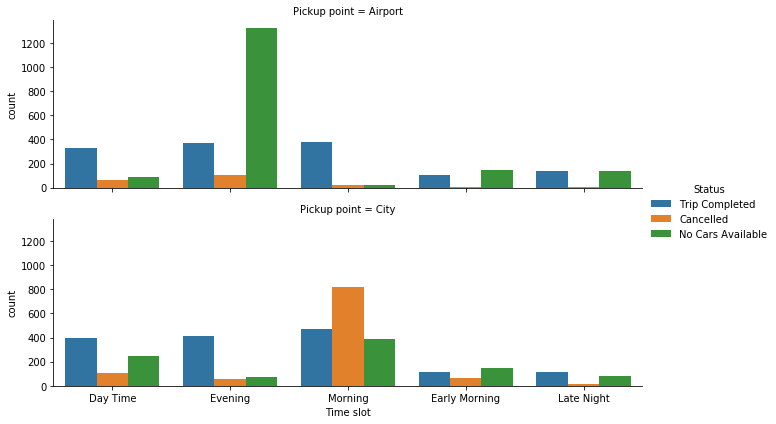

In [16]:
sns.catplot(x ="Time slot",hue ="Status",row ="Pickup point",data = df,kind ="count", height=3, aspect=3)
plt.show()

# Supply and Demand Gap

In [17]:
day_time_airport=df[(df["Time slot"]=="Day Time") & (df["Pickup point"]=="Airport")]
day_time_city=df[(df["Time slot"]=="Day Time") & (df["Pickup point"]=="City")]
evening_airport=df[(df["Time slot"]=="Evening") & (df["Pickup point"]=="Airport")]
evening_city=df[(df["Time slot"]=="Evening") & (df["Pickup point"]=="City")]
morning_airport=df[(df["Time slot"]=="Morning") & (df["Pickup point"]=="Airport")]
morning_city=df[(df["Time slot"]=="Morning") & (df["Pickup point"]=="City")]
earlymorning_airport=df[(df["Time slot"]=="Early Morning") & (df["Pickup point"]=="Airport")]
earlymorning_city=df[(df["Time slot"]=="Early Morning") & (df["Pickup point"]=="City")]
latenight_airport=df[(df["Time slot"]=="Late Night") & (df["Pickup point"]=="Airport")]
latenight_city=df[(df["Time slot"]=="Late Night") & (df["Pickup point"]=="City")]

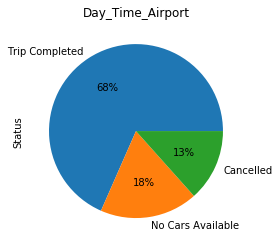

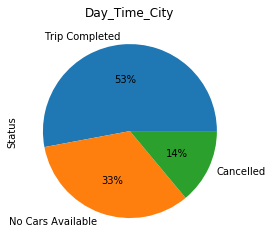

In [18]:
day_time_airport["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Day_Time_Airport")
plt.show()
day_time_city["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Day_Time_City")
plt.show()

* Inferance:  Only 81% demands were fulfilled during day time (10am to 5pm) at Airport and 67% demands were fulfilled during day time (10am to 5pm) at City.

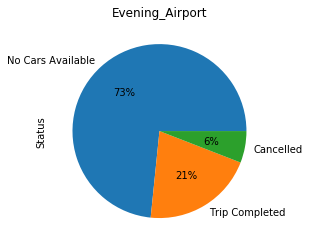

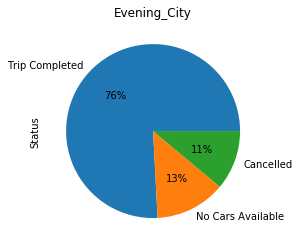

In [19]:
evening_airport["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Evening_Airport")
plt.show()
evening_city["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Evening_City")
plt.show()

* Inferance:  Only 27% demands were fulfilled during evening (5pm to 10pm) at Airport and 87% demands were fulfilled during evening (5pm to 10pm) at City.

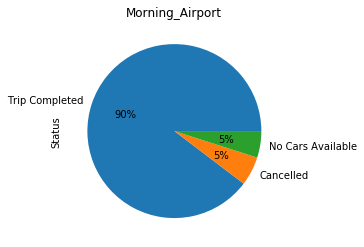

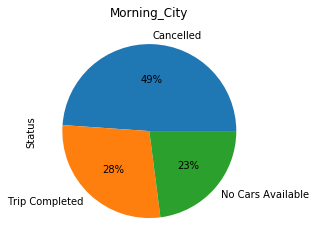

In [20]:
morning_airport["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Morning_Airport")
plt.show()
morning_city["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Morning_City")
plt.show()

* Inferance:  Only 95% demands were fulfilled during morning (5am to 10am) at Airport and 77% demands were fulfilled during morning (5am to 10am) at City.

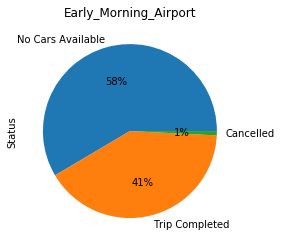

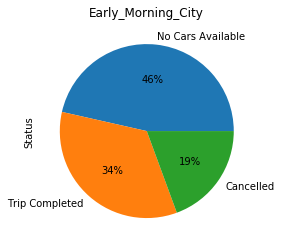

In [21]:
earlymorning_airport["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Early_Morning_Airport")
plt.show()
earlymorning_city["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Early_Morning_City")
plt.show()

* Inferance:  Only 42% demands were fulfilled during early morning (midnight to 5am) at Airport and 53% demands were fulfilled during early morning (midnight to 5am) at City.

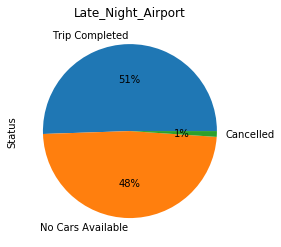

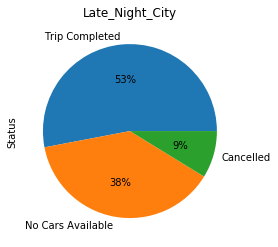

In [22]:
latenight_airport["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Late_Night_Airport")
plt.show()
latenight_city["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.title("Late_Night_City")
plt.show()

* Inferance:  Only 52% demands were fulfilled during late night (10pm to midnight) at Airport and 62% demands were fulfilled during late night (10pm to midnight) at City.